# Notebook de prueba

Este notebook es un ejemplo cómo procesar y utilizar los datos de entrenamiento y de prueba para la competición https://www.kaggle.com/c/house-prices-advanced-regression-techniques/ de la práctica 3 de Inteligencia de Negocio. 

Es un ejemplo que es claramente mejorable, se deja a el/la estudiante el mejorarlo para obtener mejores resultados.

## Carga de librería

Lo primero es cargar las librerías.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Lectura de datos

Ahora leemos los datos.

In [2]:
train = pd.read_csv("practica3_datos/train.csv", na_values="NaN") # Definimos na_values para identificar bien los valores perdidos

In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Visualización

Vamos a hacer unas ligeras visualizaciones de ejemplo.

Ahora visualizo los valores de venta de entrenamiento.

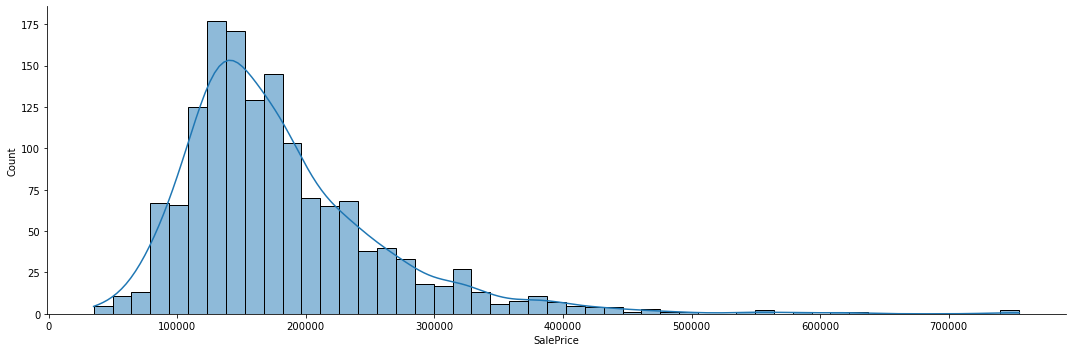

In [4]:
sns.displot(data=train, x="SalePrice", aspect=3, kde=True)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

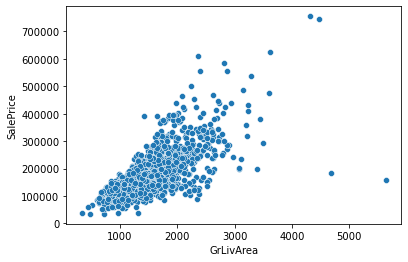

In [4]:
sns.scatterplot(data=train, x="GrLivArea", y="SalePrice")


C:\Users\germa\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


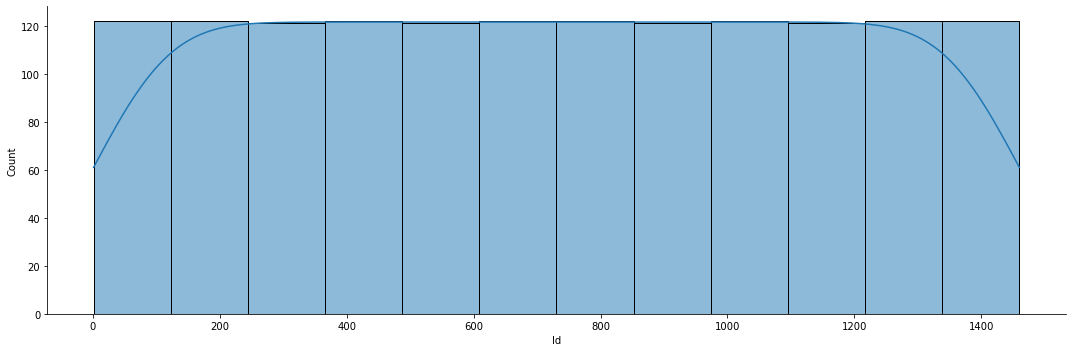

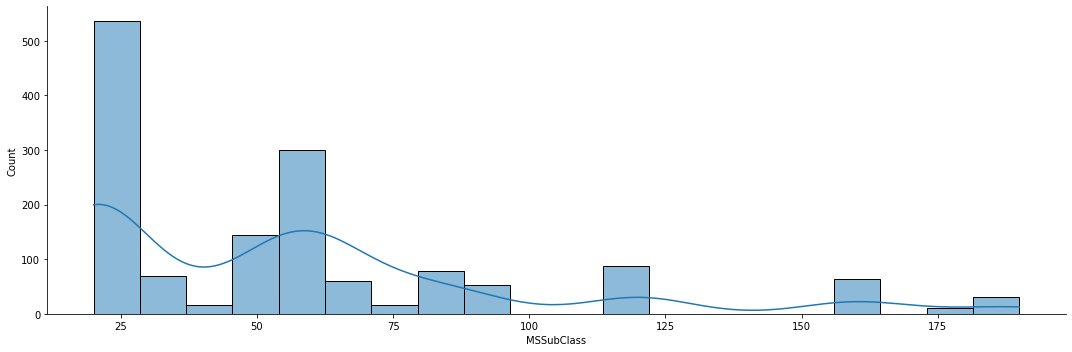

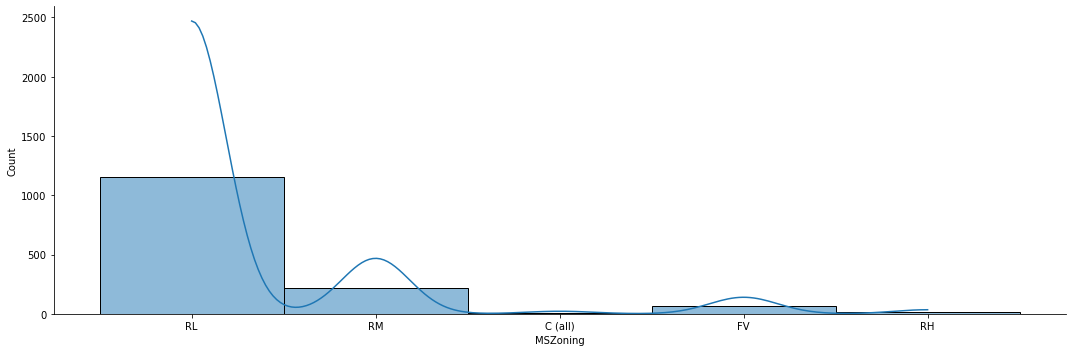

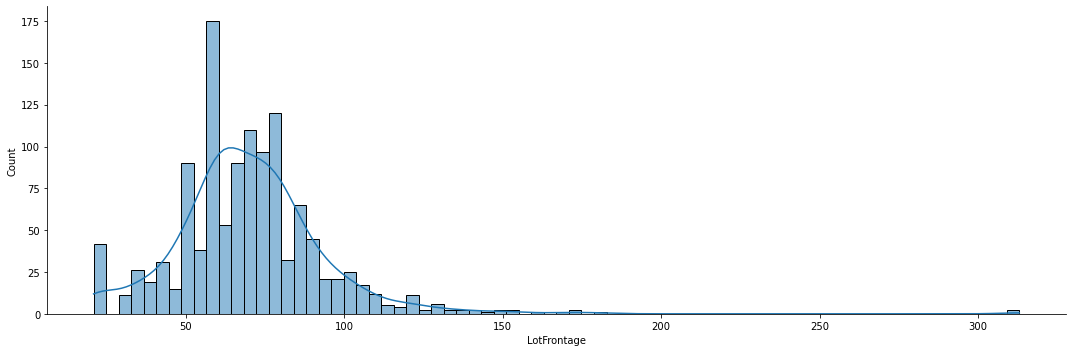

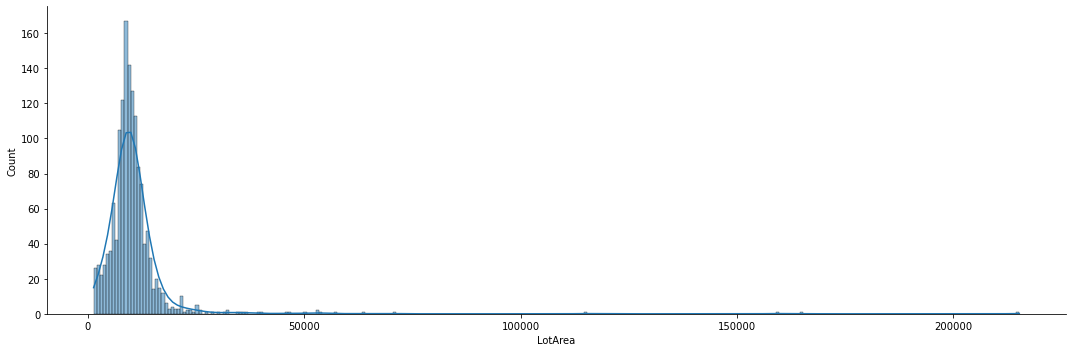

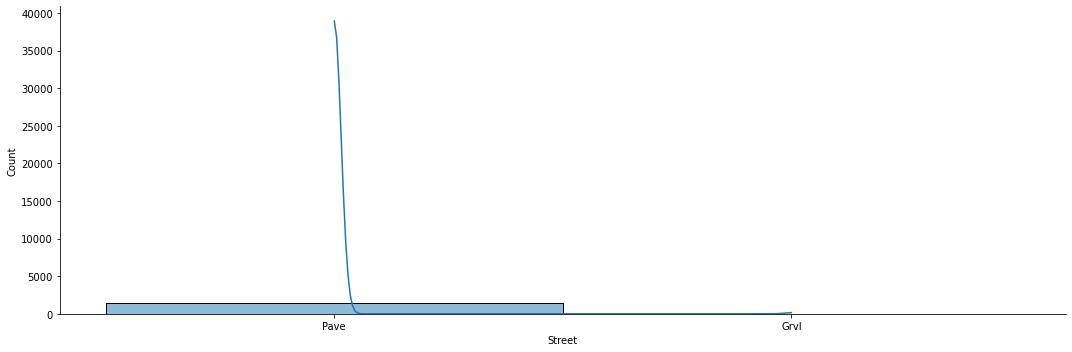

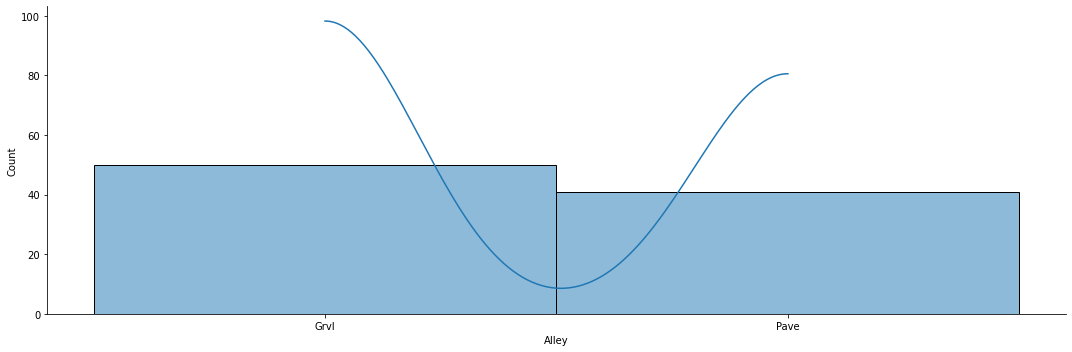

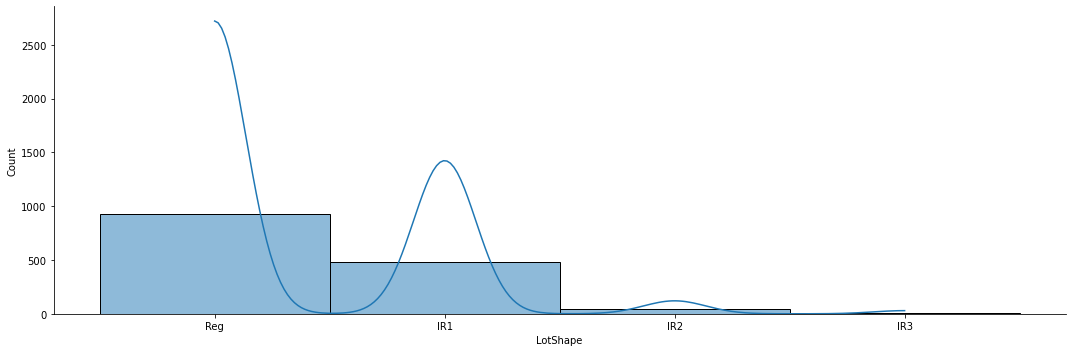

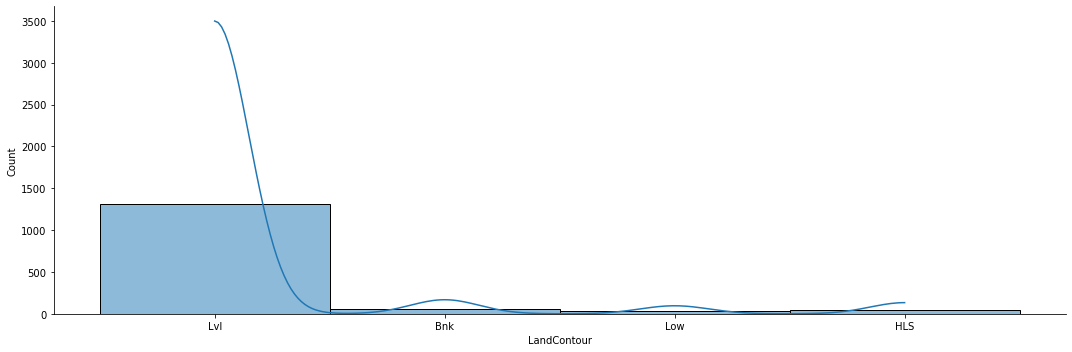

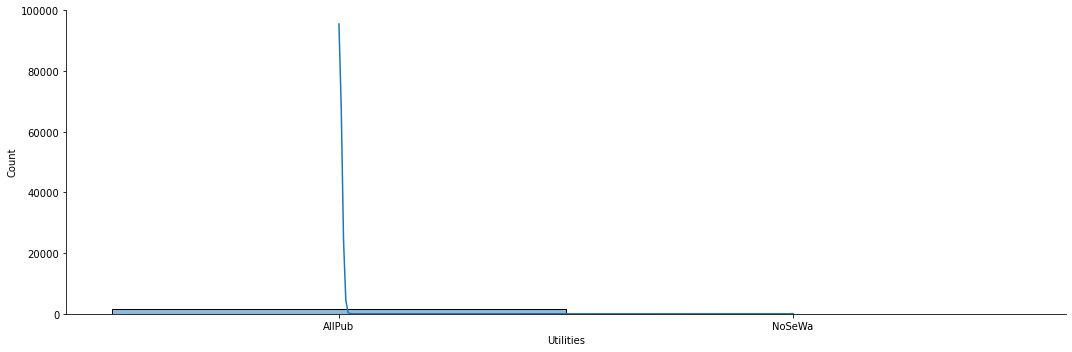

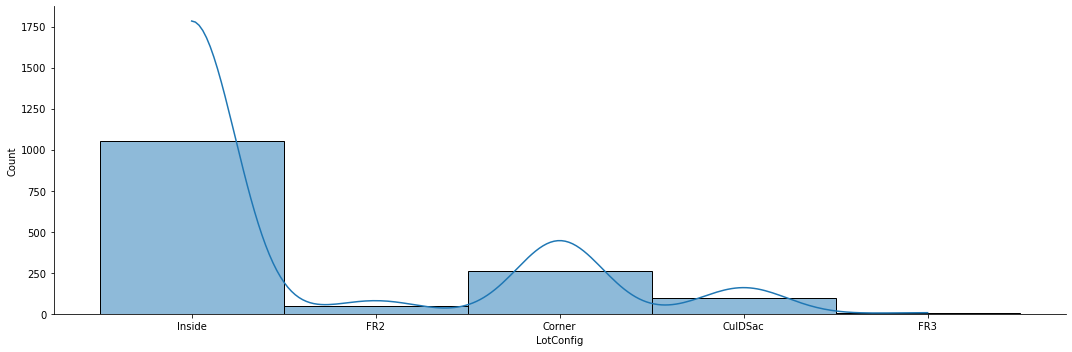

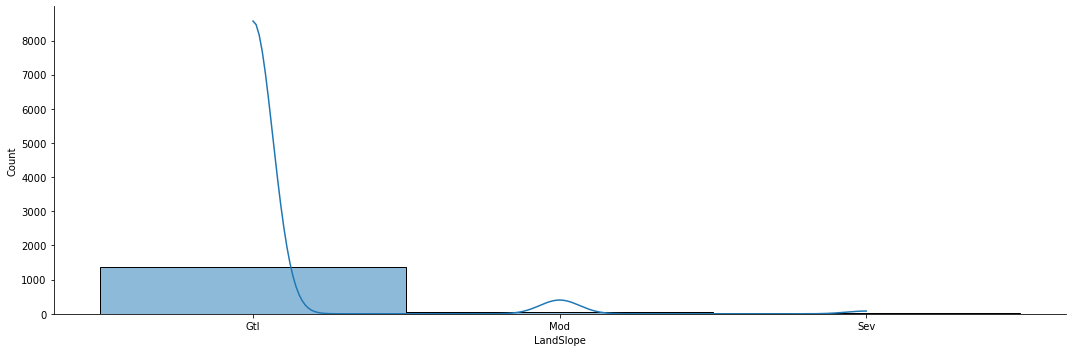

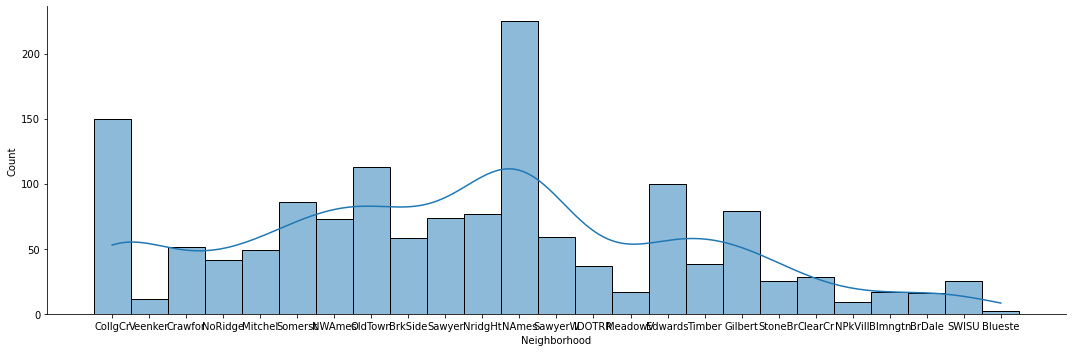

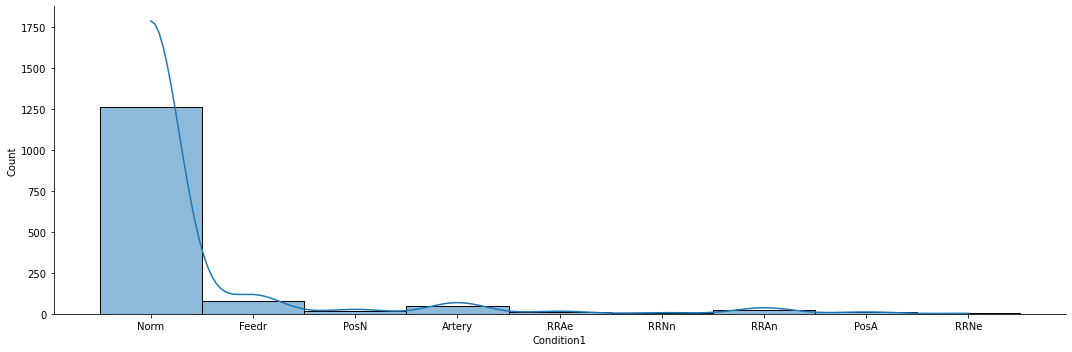

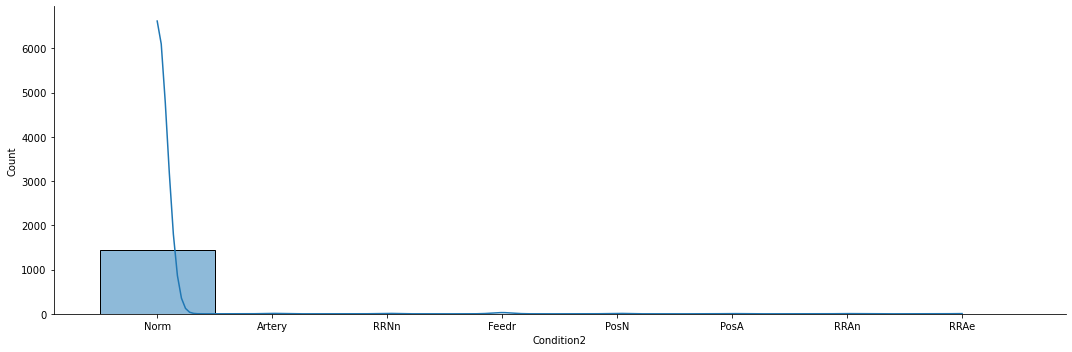

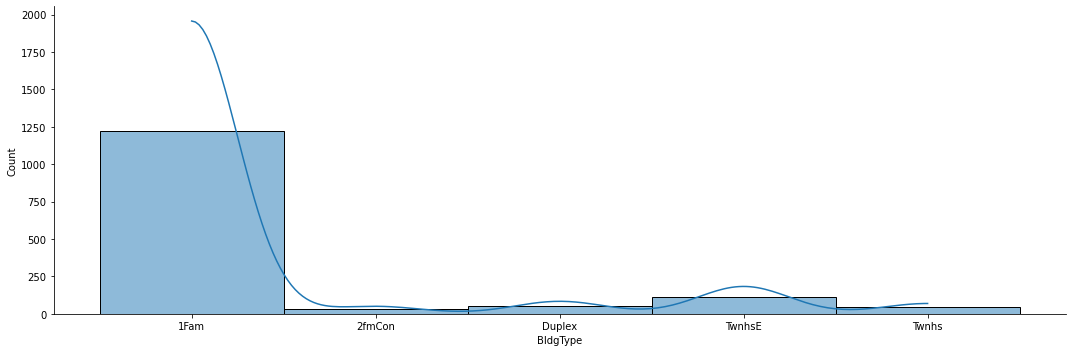

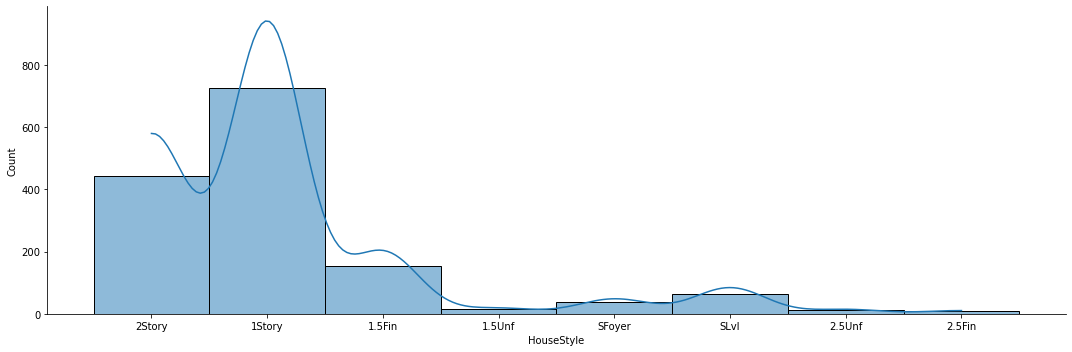

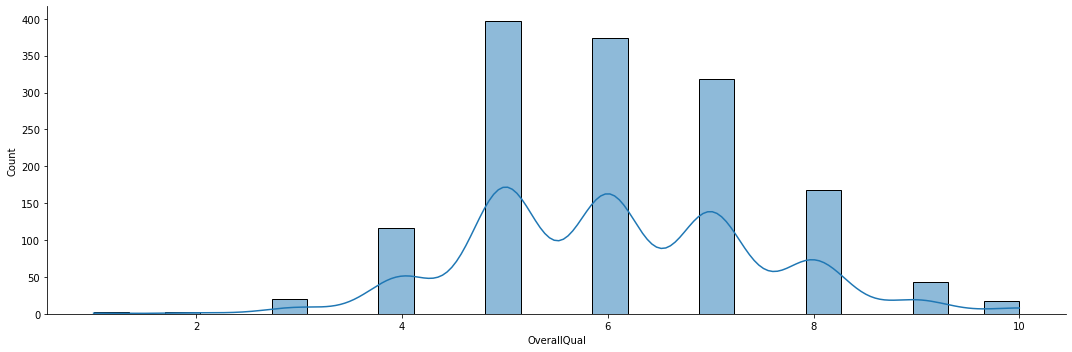

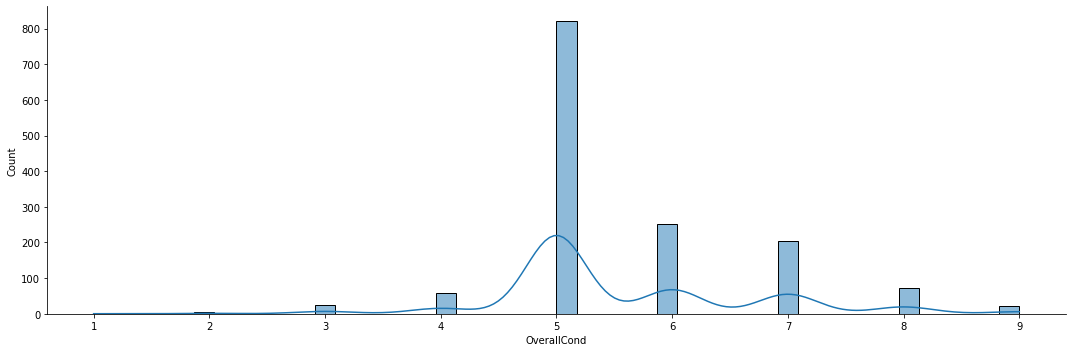

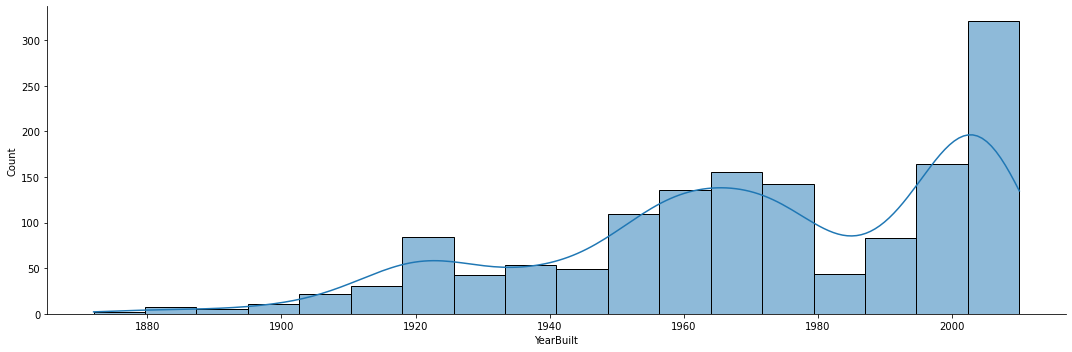

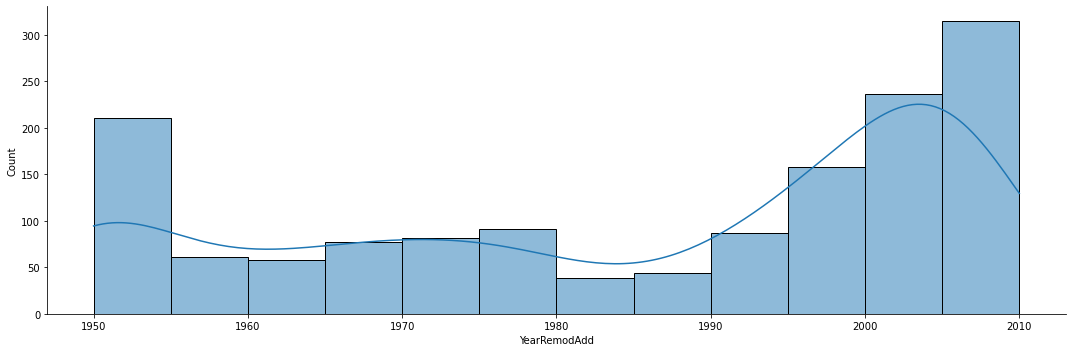

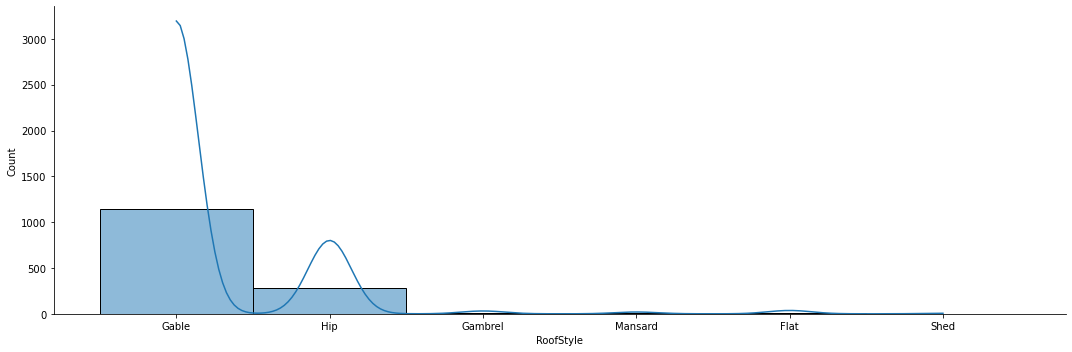

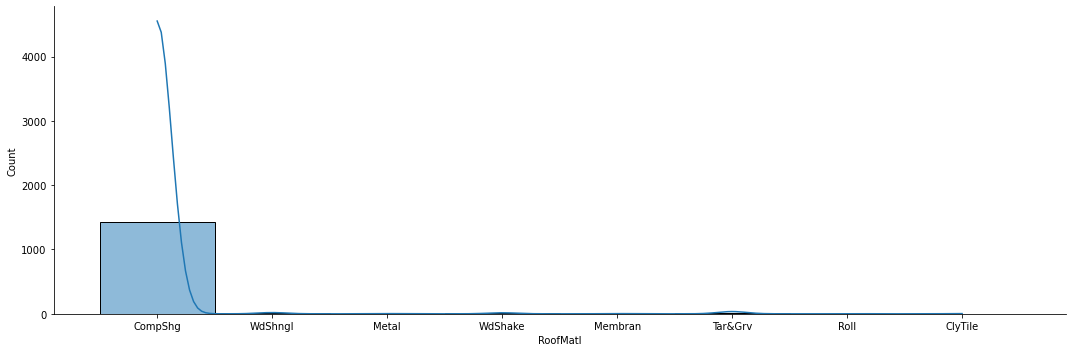

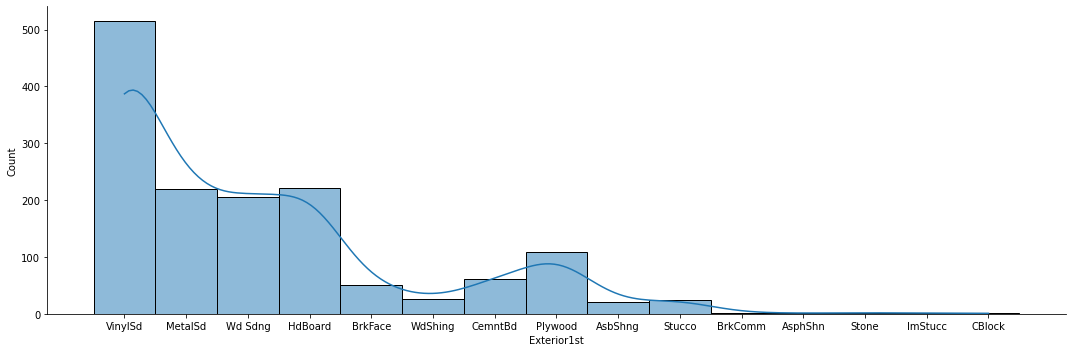

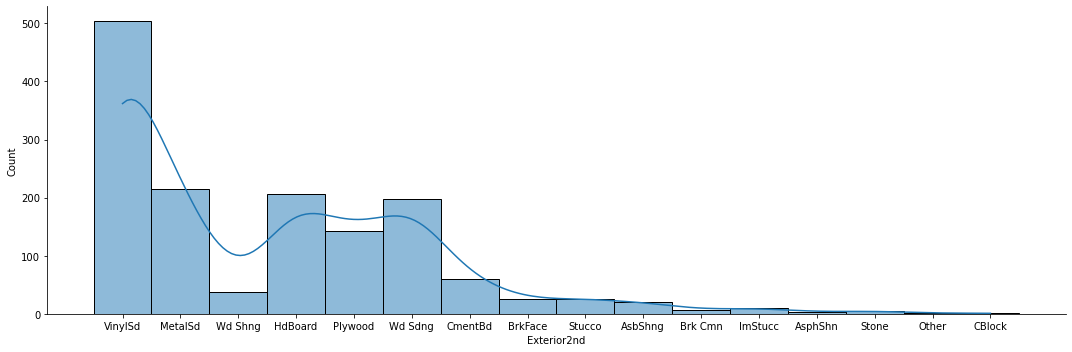

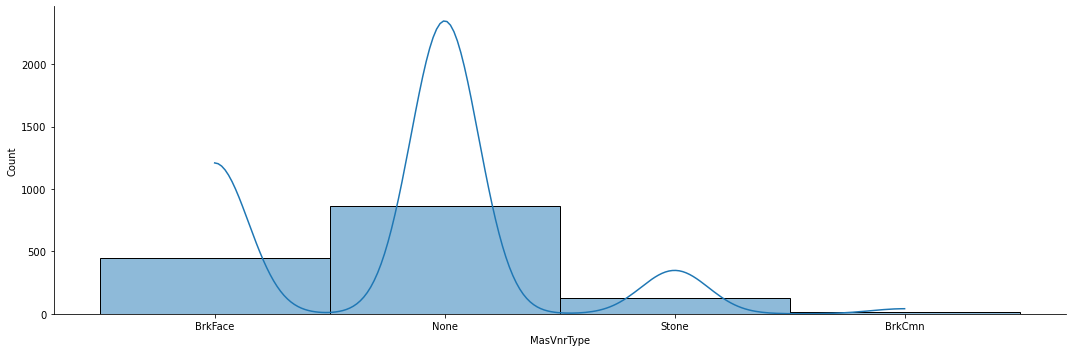

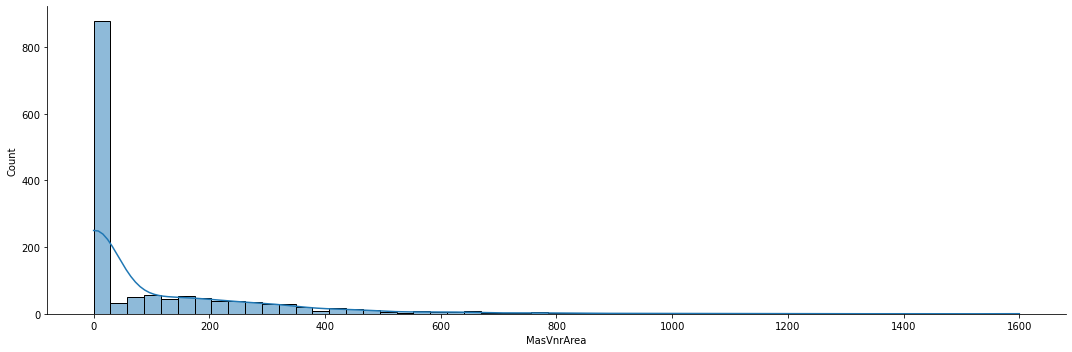

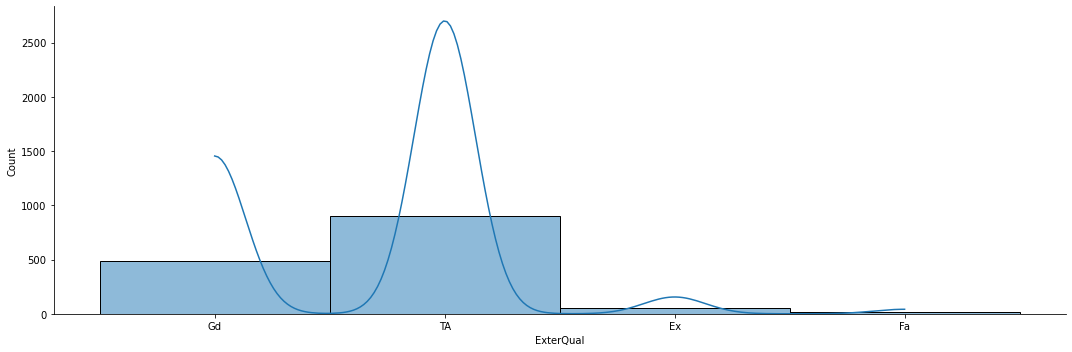

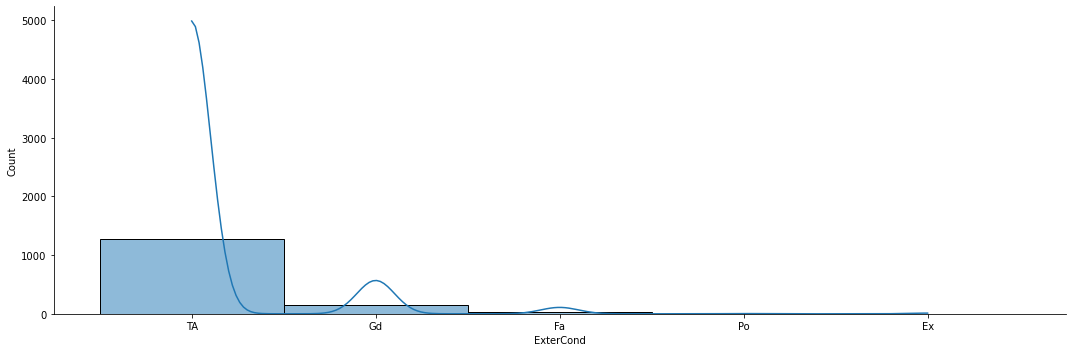

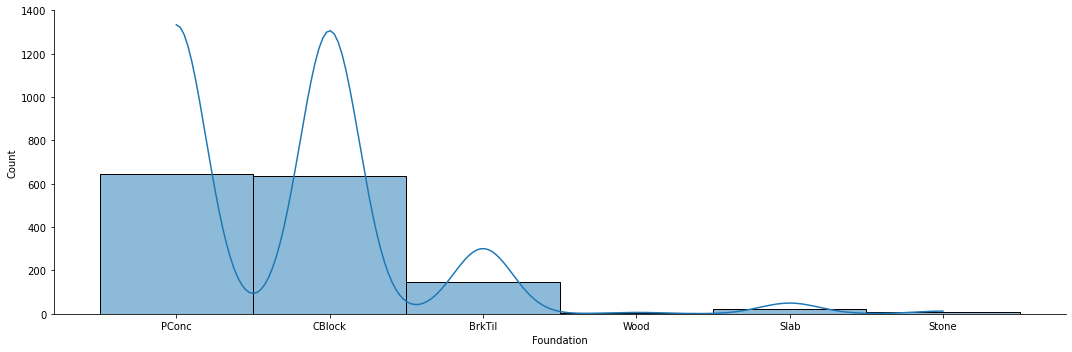

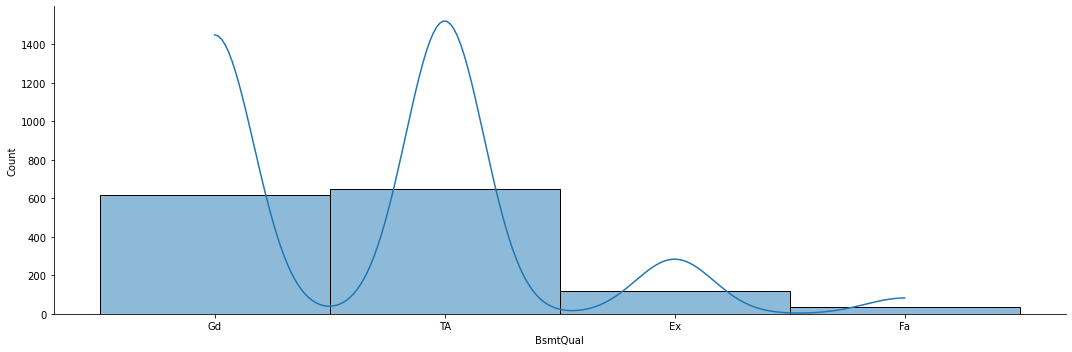

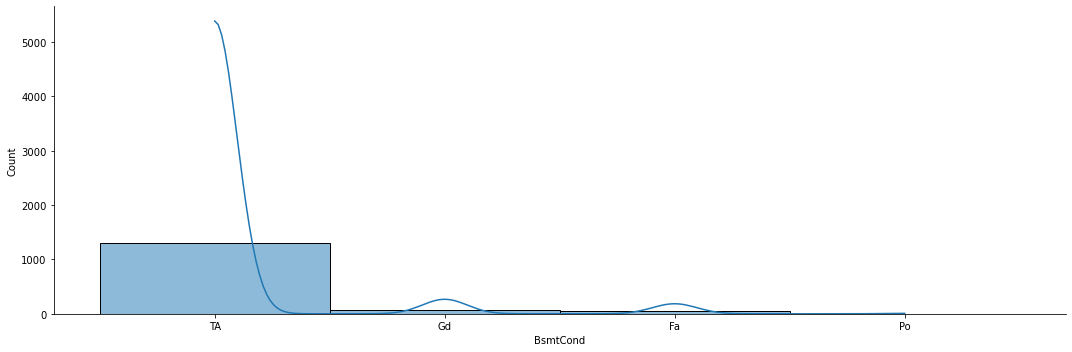

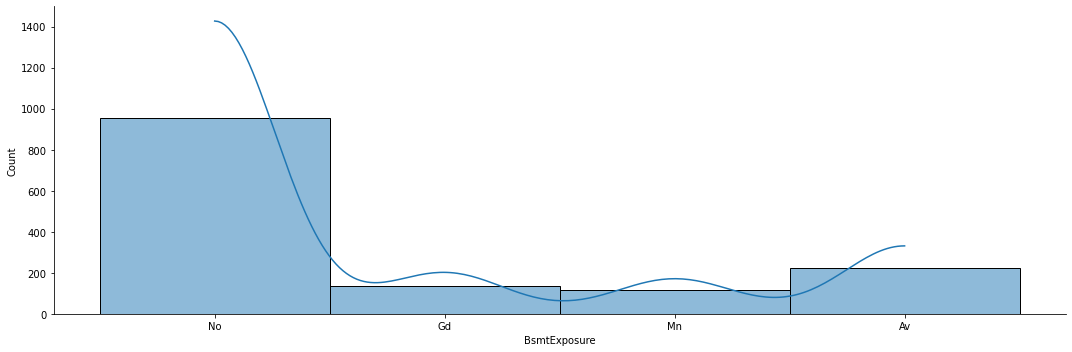

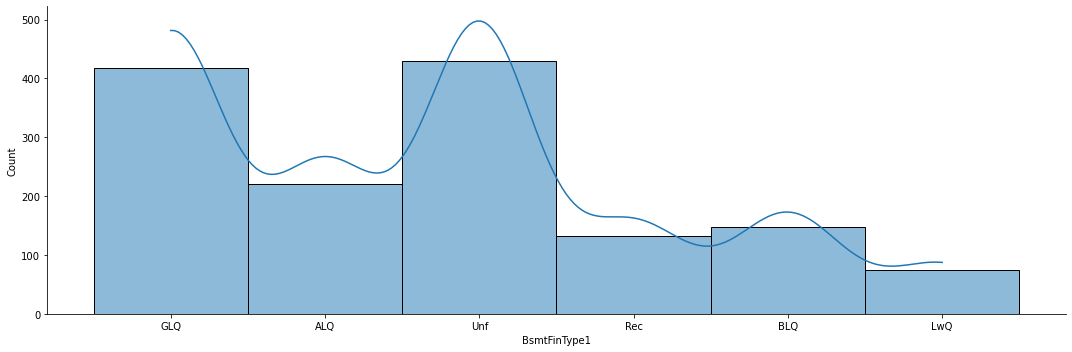

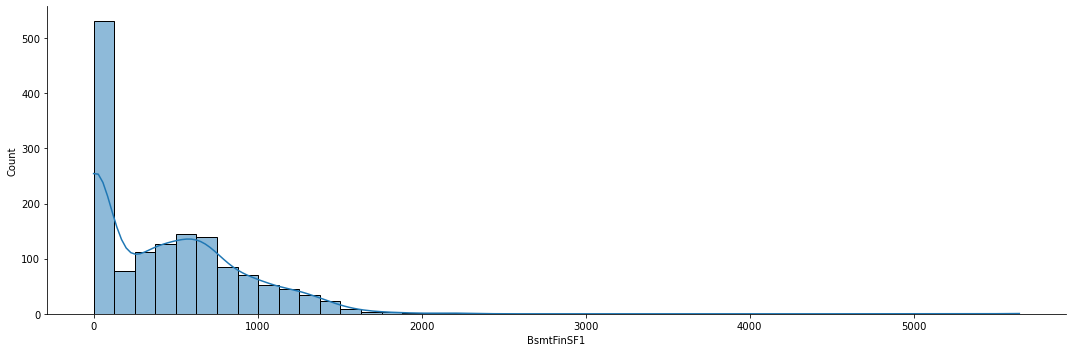

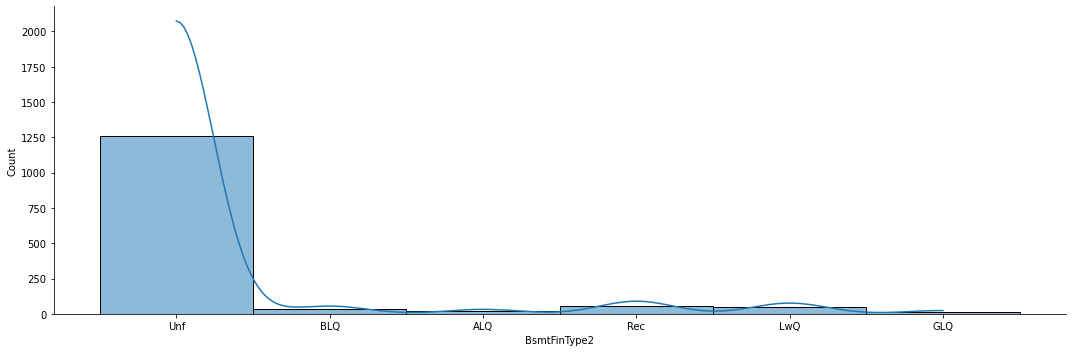

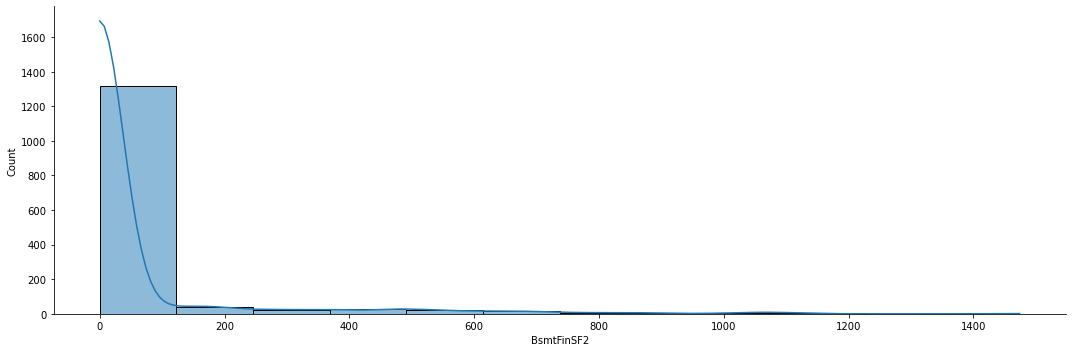

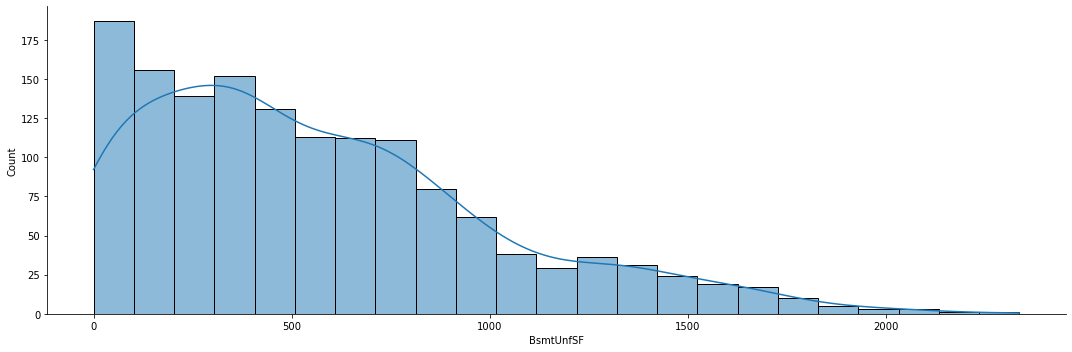

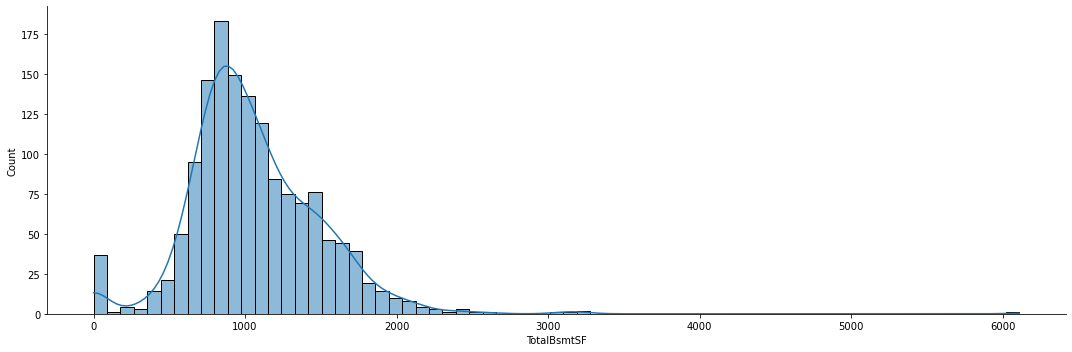

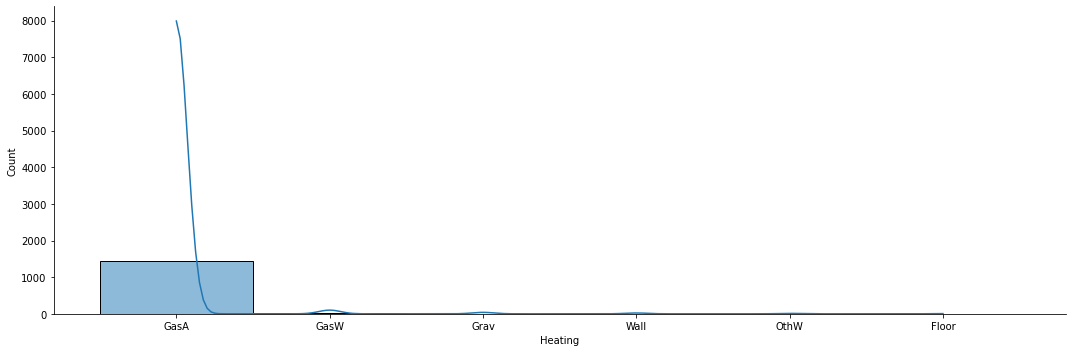

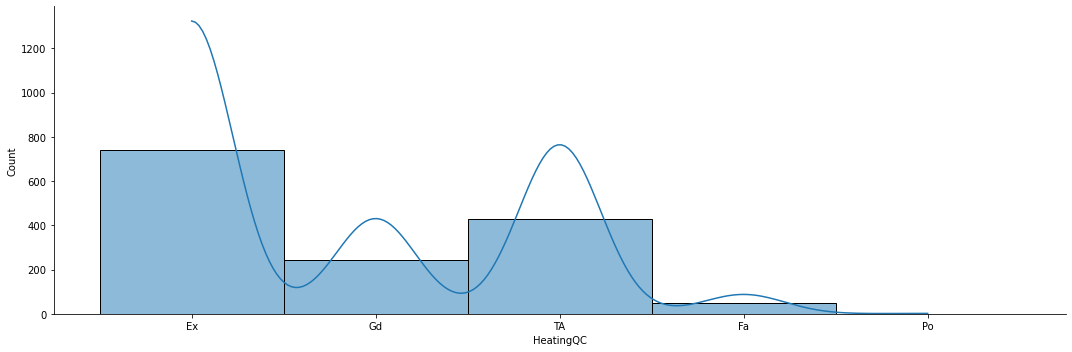

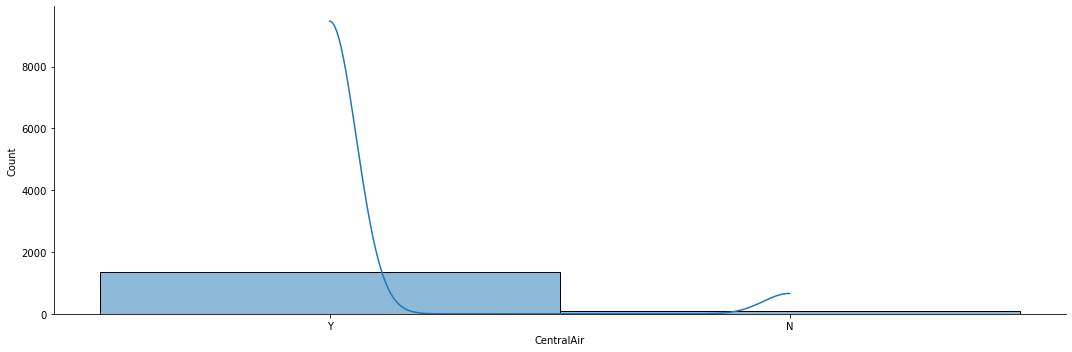

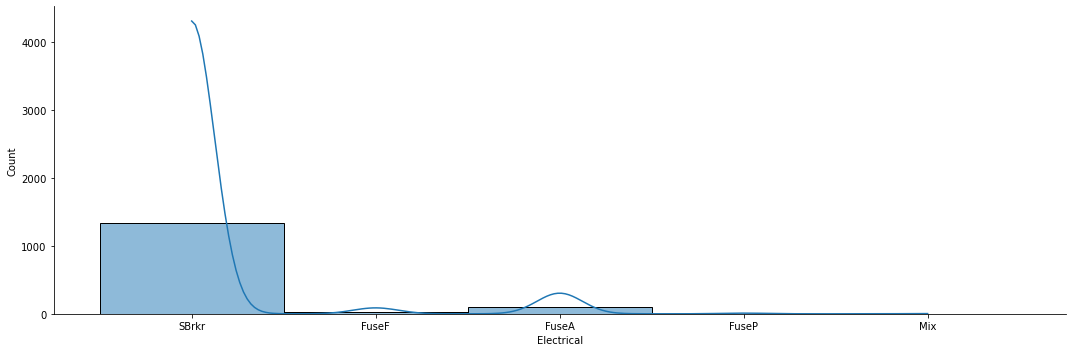

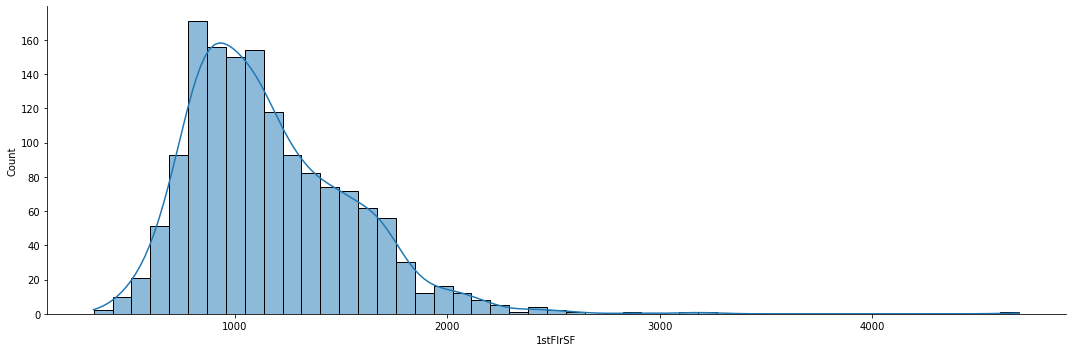

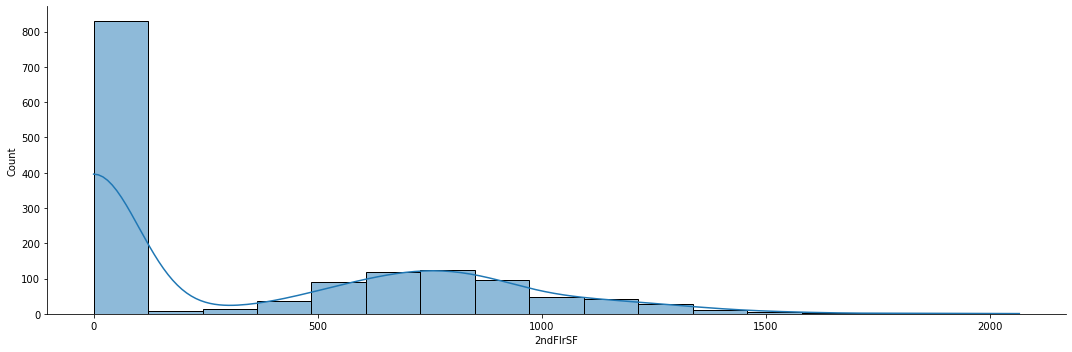

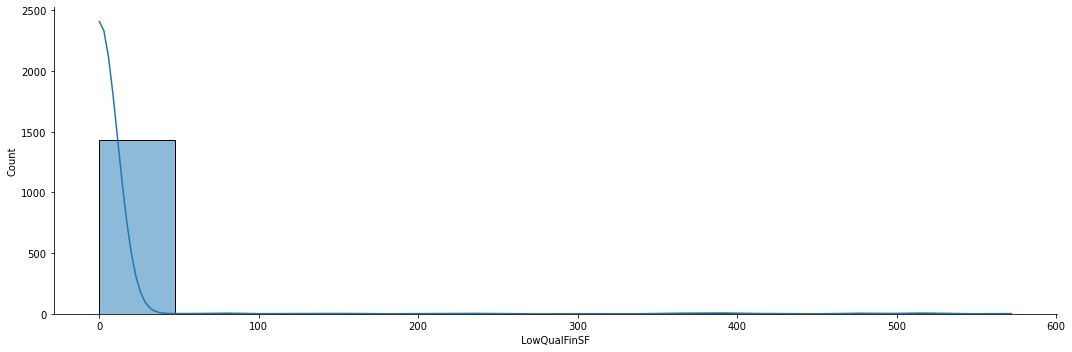

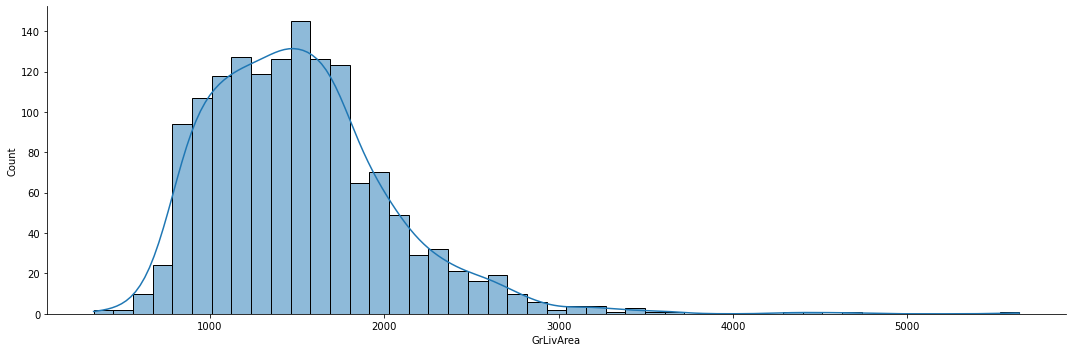

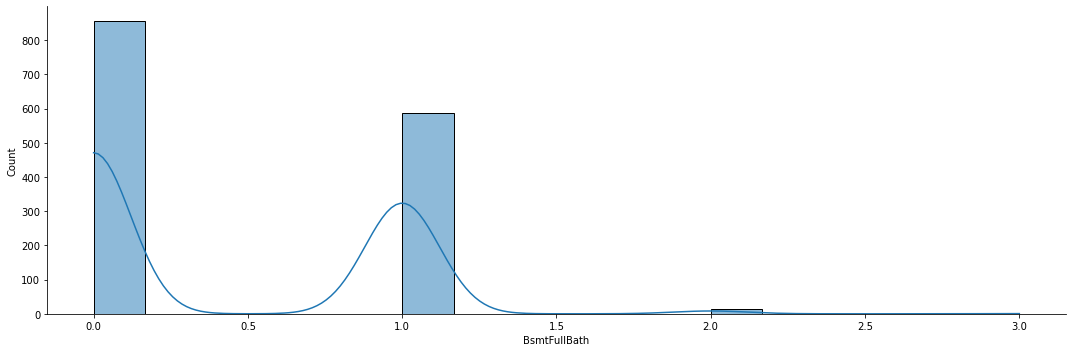

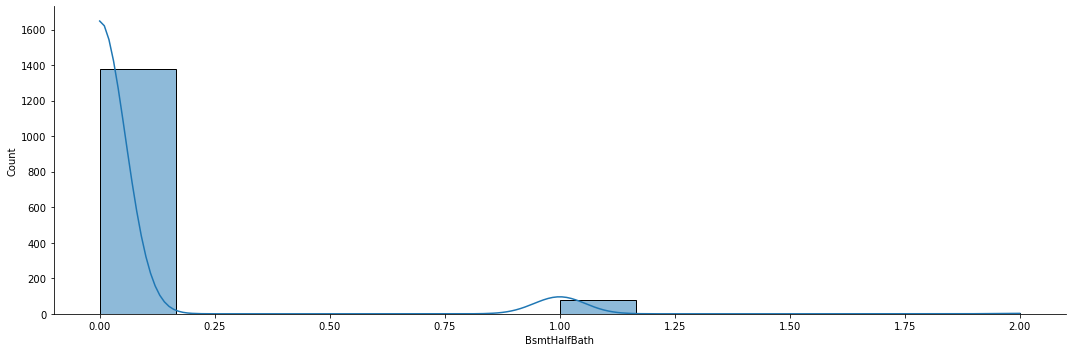

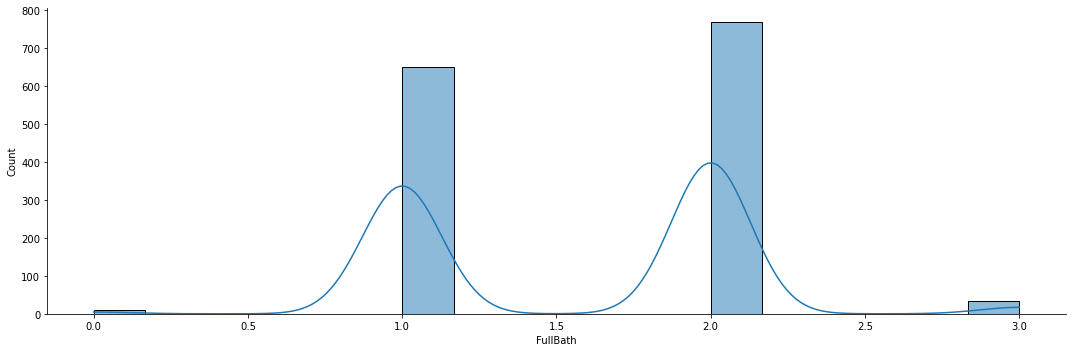

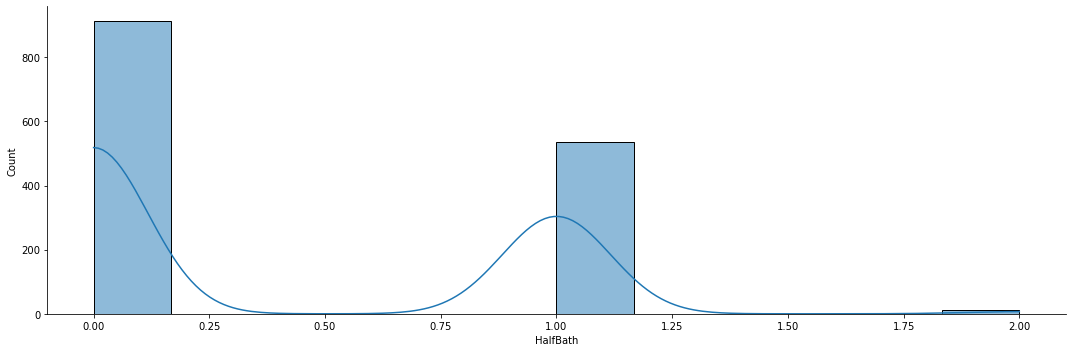

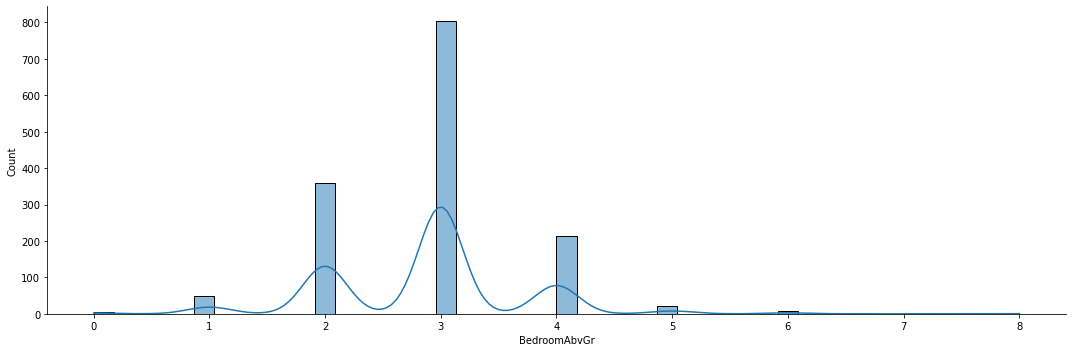

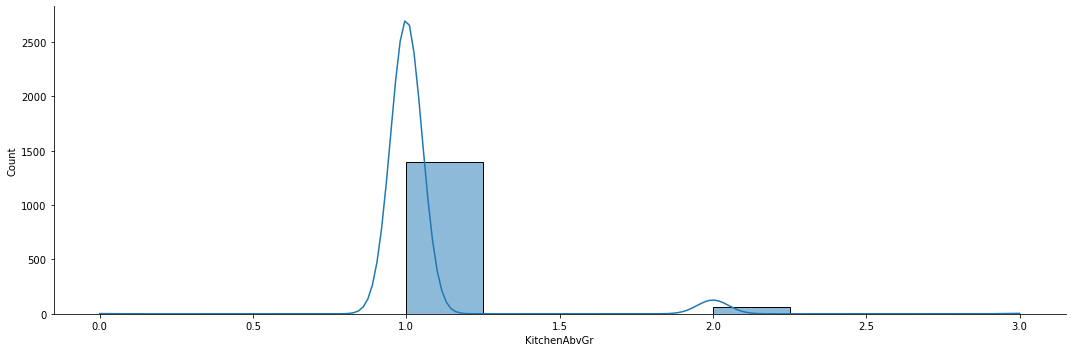

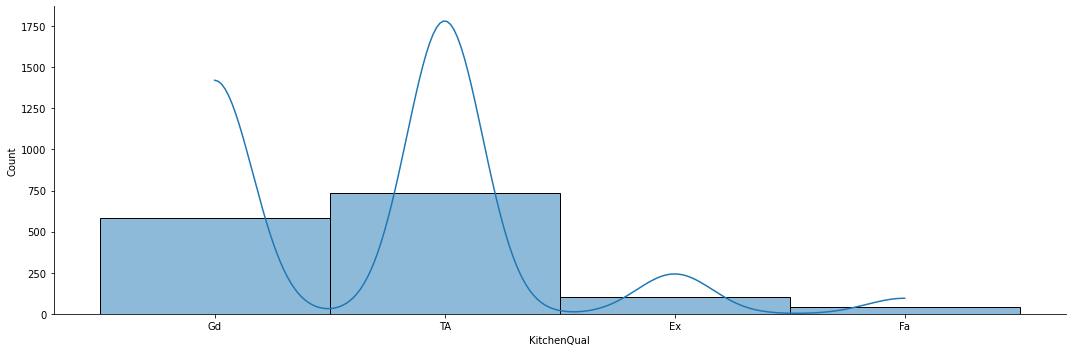

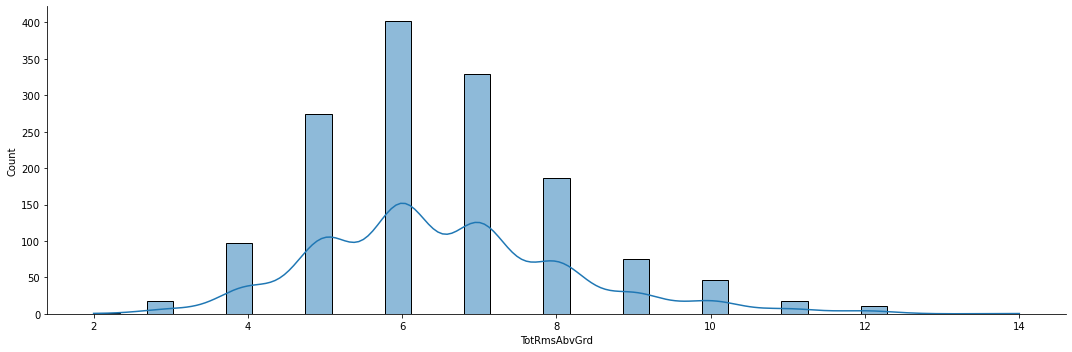

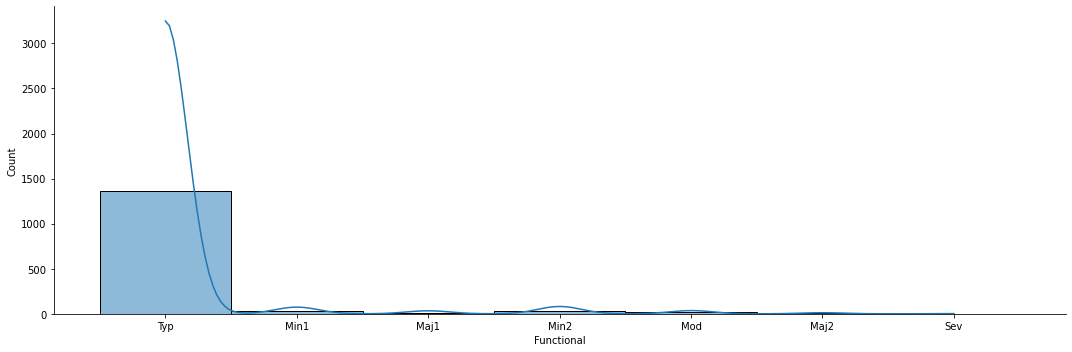

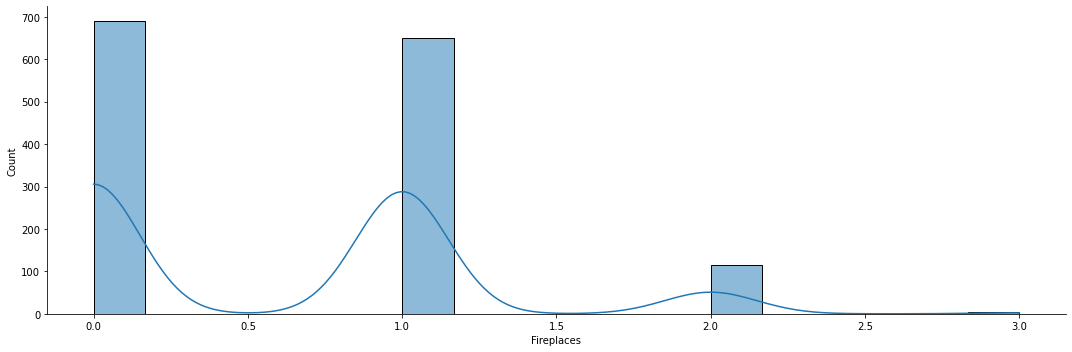

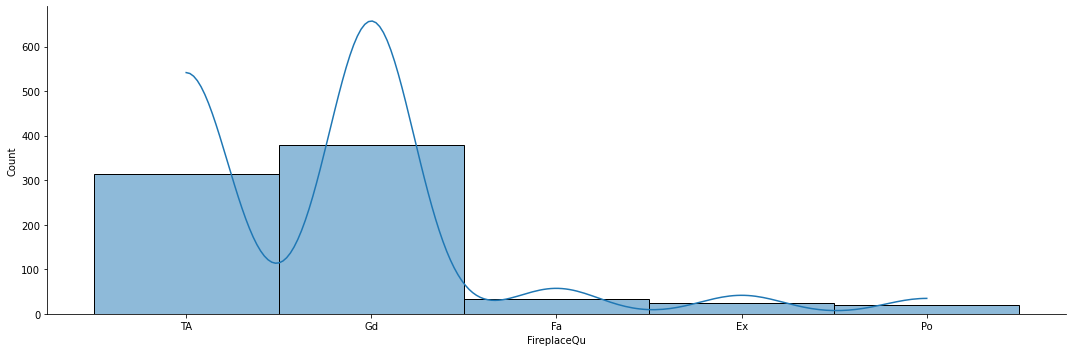

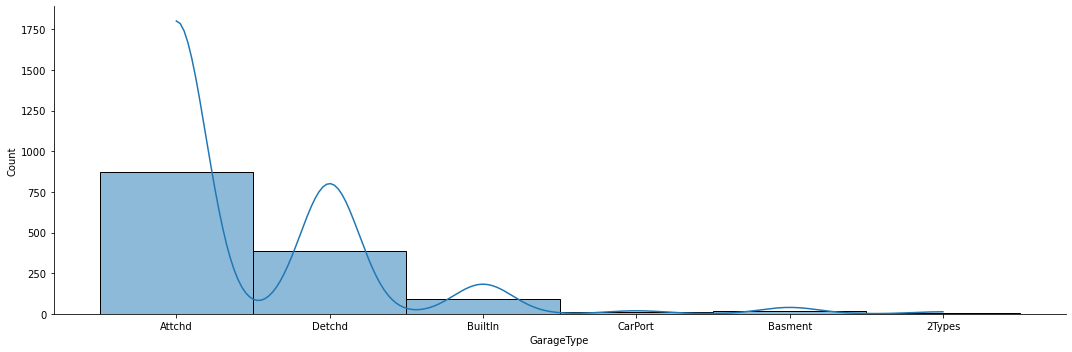

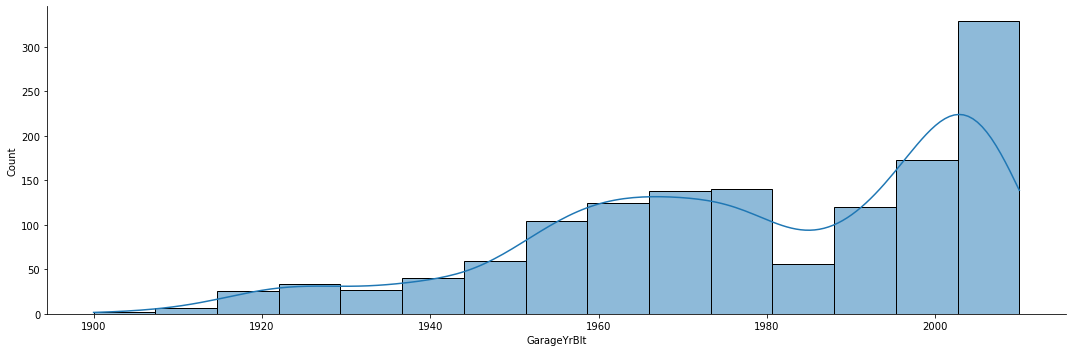

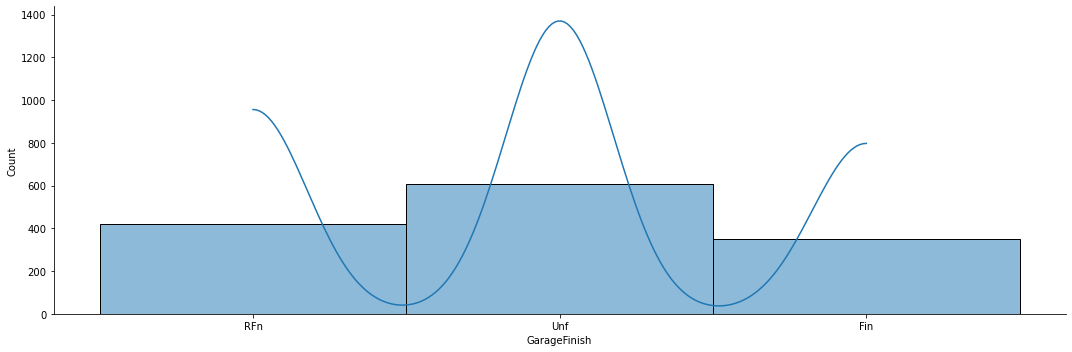

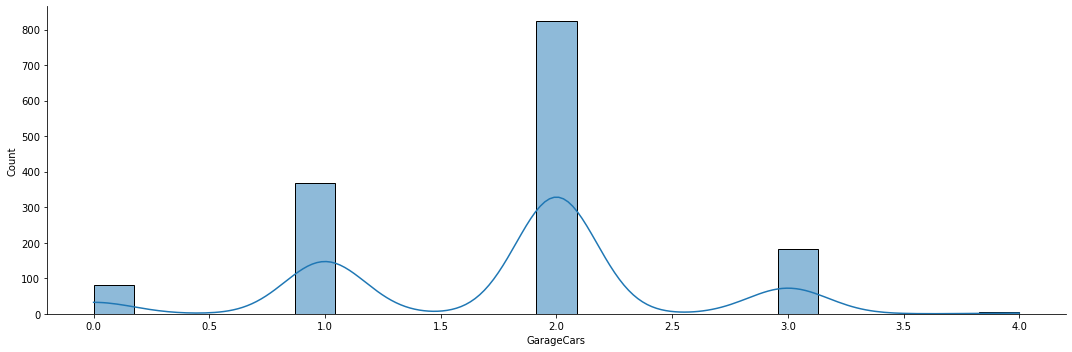

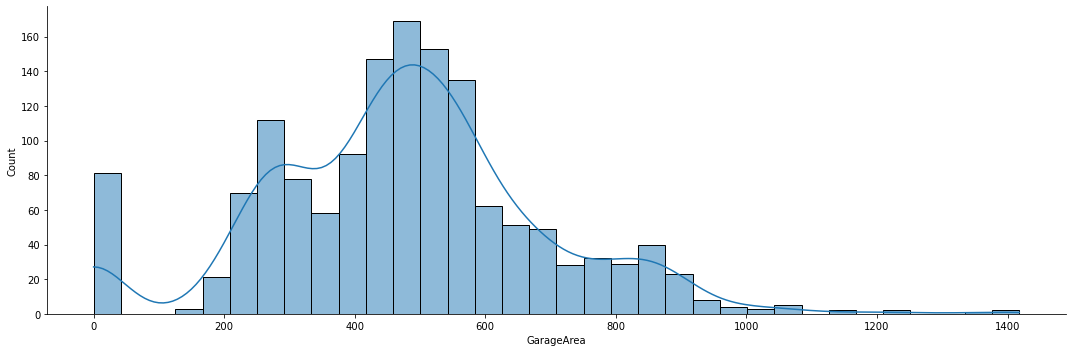

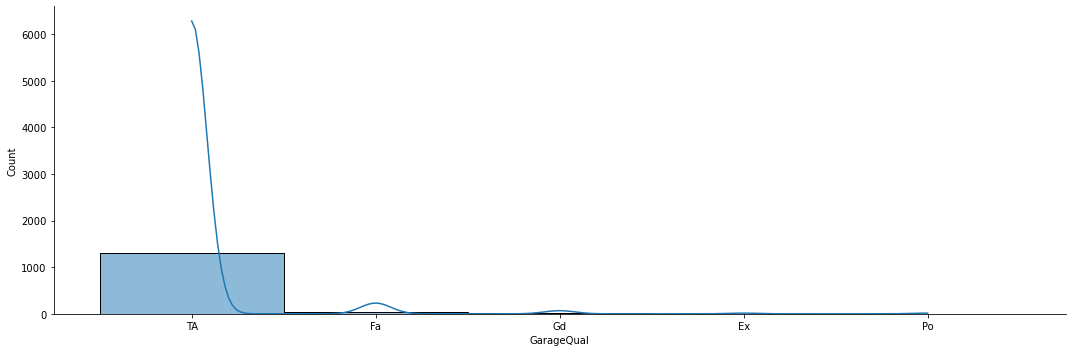

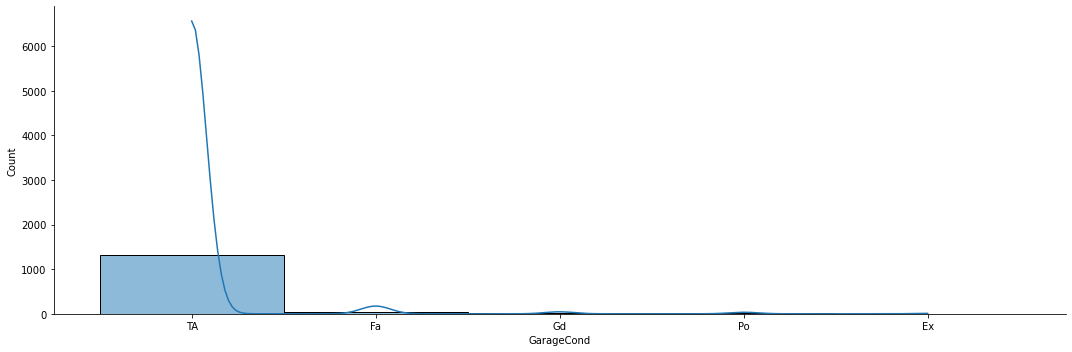

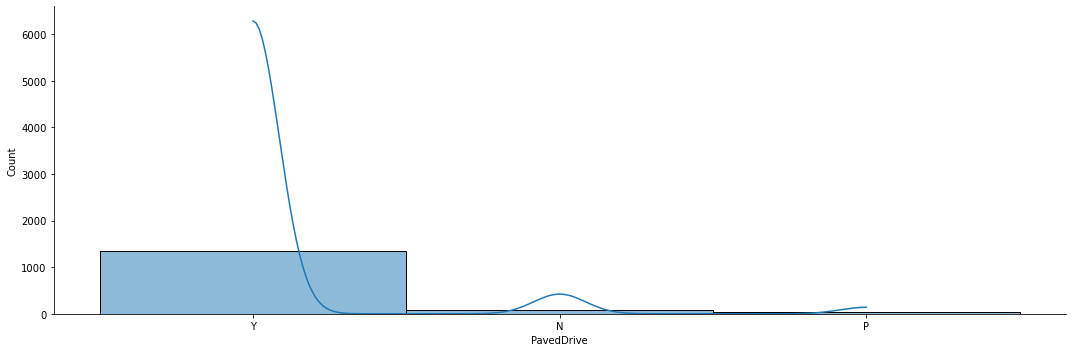

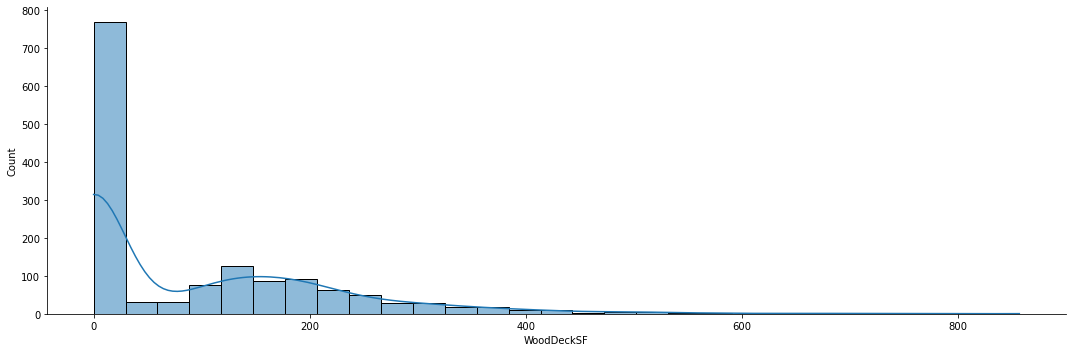

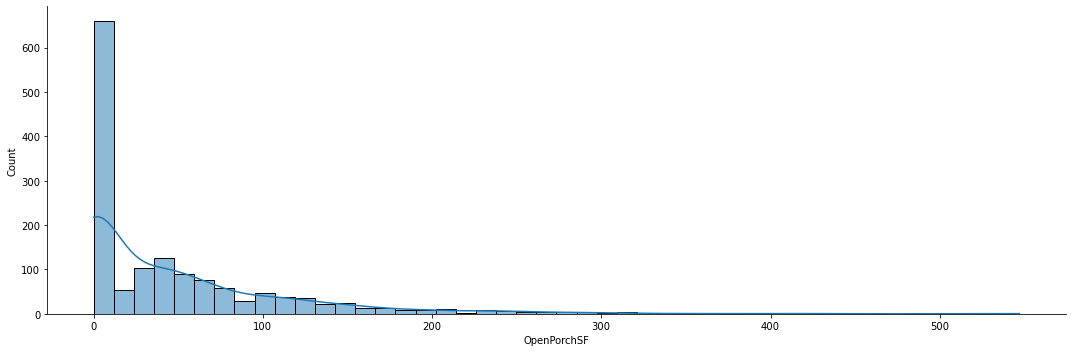

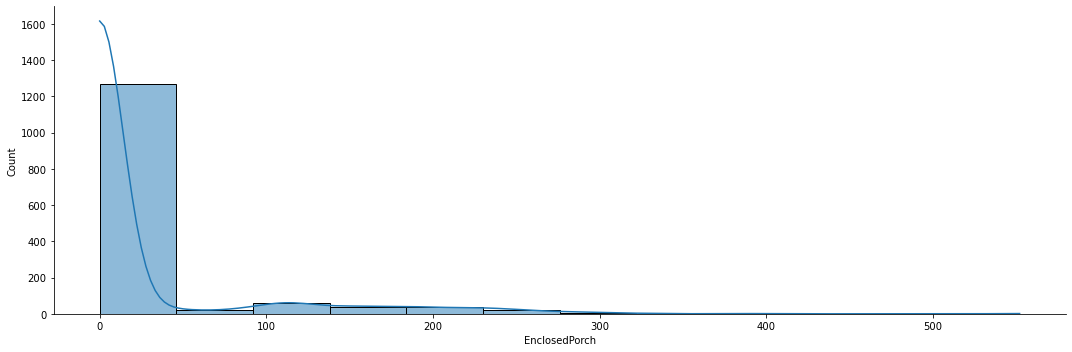

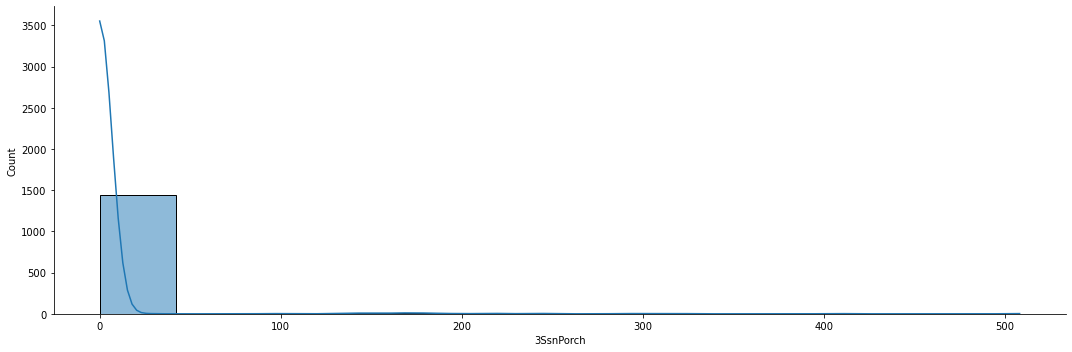

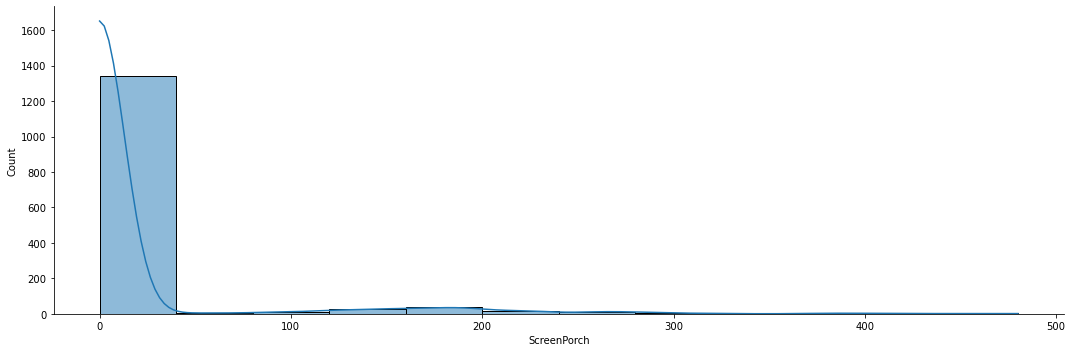

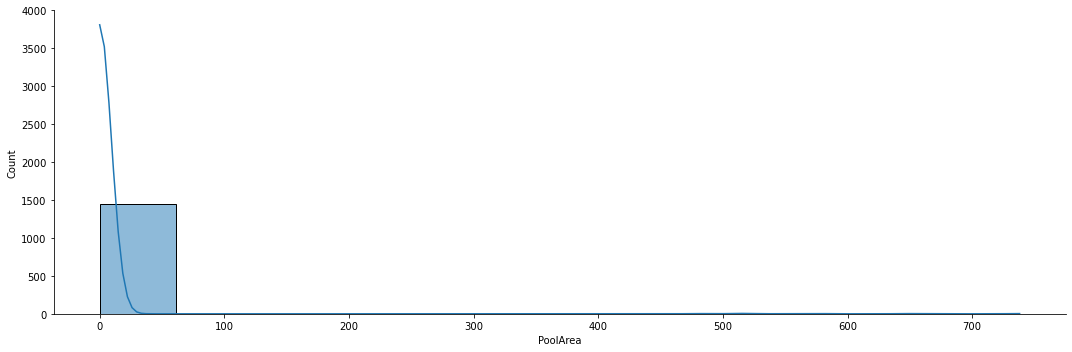

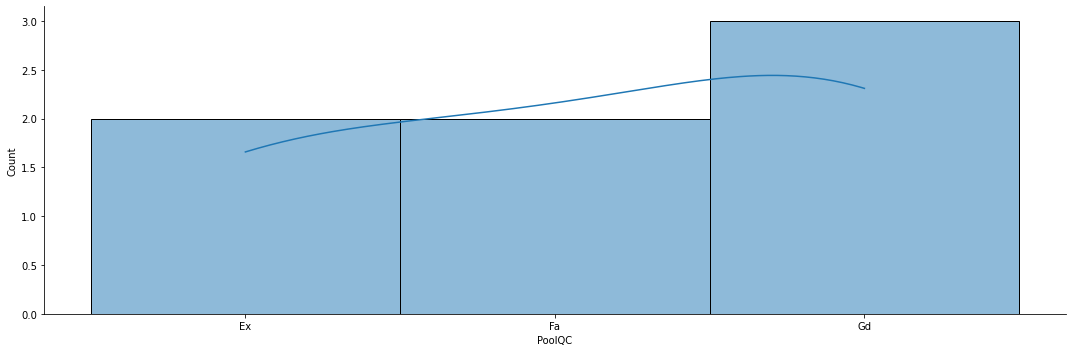

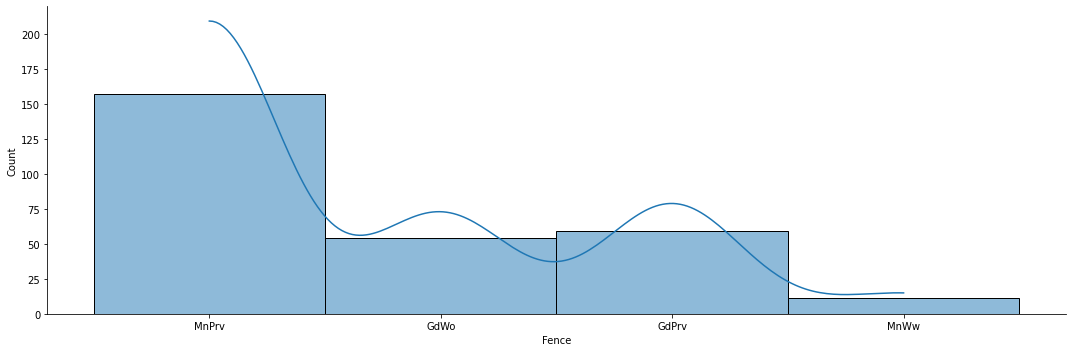

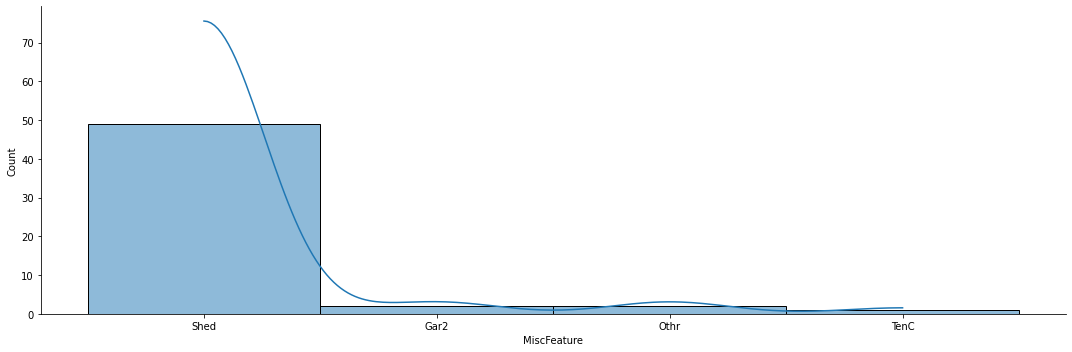

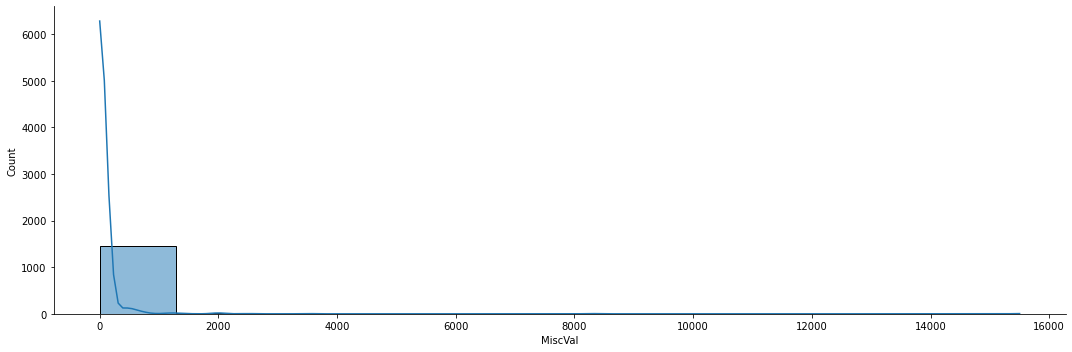

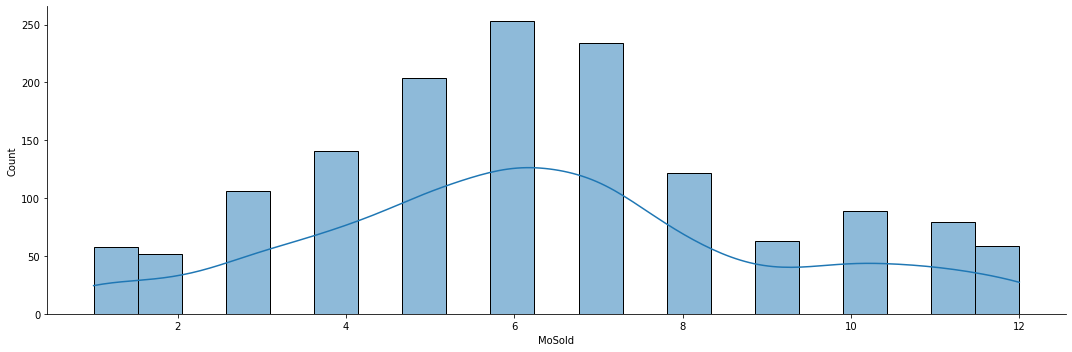

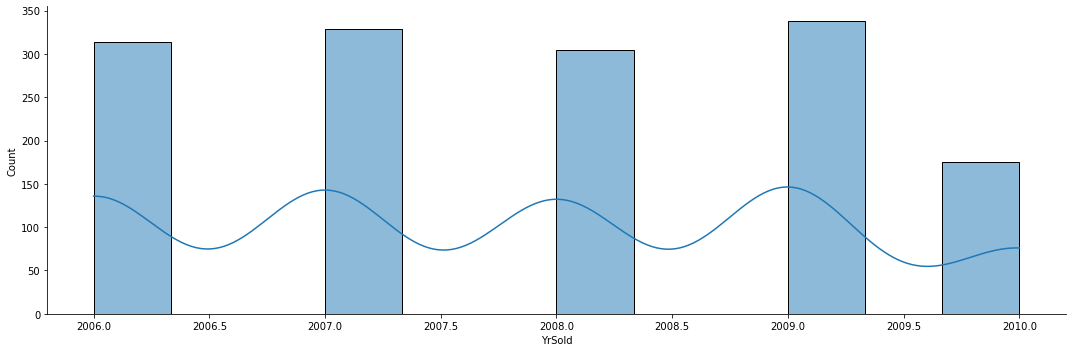

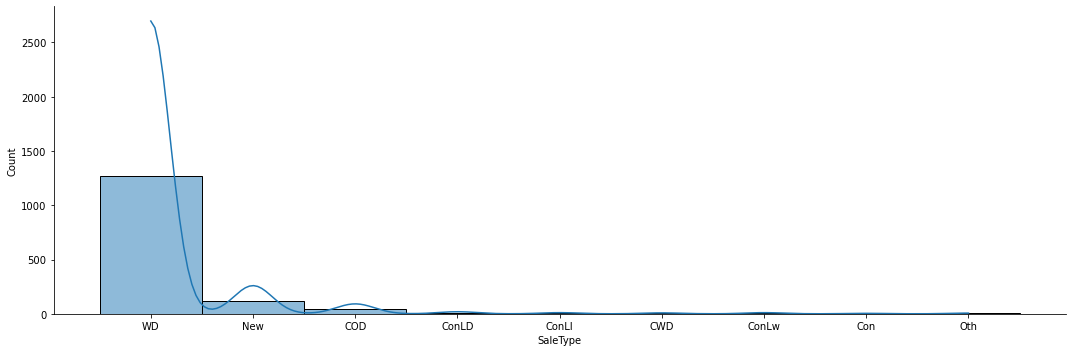

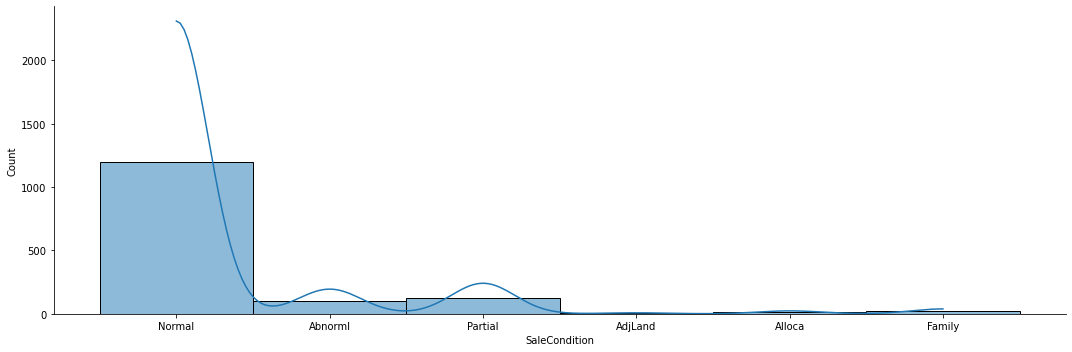

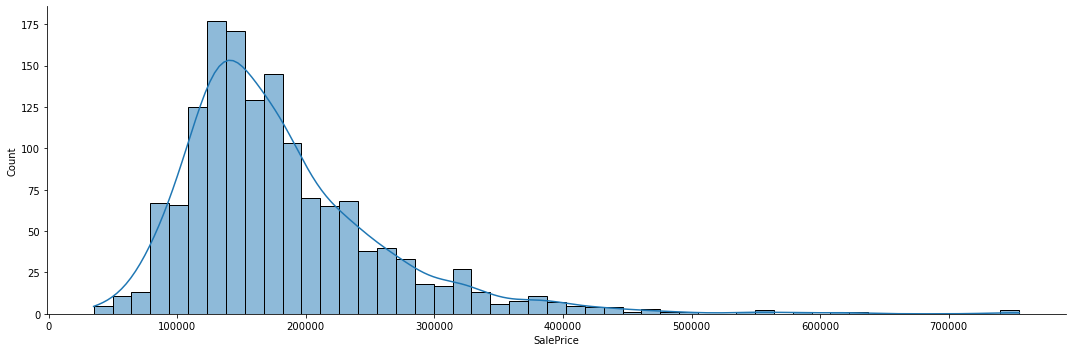

In [5]:
for x in train.columns:
    sns.displot(data=train, x=x, aspect=3, kde=True)

Ahora visualizamos cómo cambia la distribución (usando un boxplot) según otro atributo, como el tipo de calle.

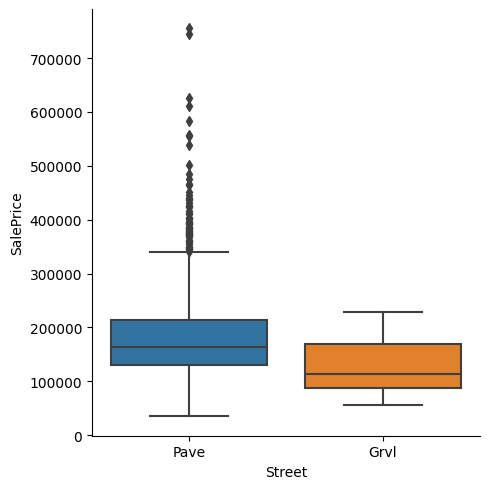

In [5]:
sns.catplot(data=train, y="SalePrice", x="Street", kind="box")


## Procesar datos

Vamos a procesar datos:
- Valores perdidos.
- Etiquetado.

Primero quito el Id de train que no me sirve de nada, y complica el etiquetado. También la quito de test pero antes lo guardo (para el fichero de salida)

In [5]:
if 'Id' in train:
    train.drop('Id', axis=1, inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [8]:
test = pd.read_csv("test.csv", na_values="NaN")
test_ids = test.Id
test = test.drop('Id', axis=1)

Concateno la entrada de ambos para los procesos de etiquetado, que aprenda con ambos conjuntos

In [9]:
input_all = pd.concat([train.drop('SalePrice', axis=1), test])

In [10]:
input_all.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Ahora selecciono los atributos de tipo categórico (los que no son numéricos)

In [11]:
col_cat = list(input_all.select_dtypes(exclude=np.number).columns)

In [12]:
col_cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

Compruebo que son realmente categóricos.

In [13]:
input_all[col_cat].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


## Proceso valores perdidos

In [14]:
test.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

In [15]:
train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

Hay valores perdidos tanto en el conjunto de entrenamiento como en el de test.

In [16]:
from sklearn.impute import SimpleImputer

Voy a reemplazar los valores categóricos por el más frecuente (es mejorable)

In [17]:
imputer_cat = SimpleImputer(strategy="most_frequent")
imputer_cat.fit(input_all[col_cat])
train[col_cat] = imputer_cat.transform(train[col_cat])
test[col_cat] = imputer_cat.transform(test[col_cat])

Compruebo que la variable objetivo no tenga valores nulos. Si fuese el caso habría que borrar dichas instancias.

In [18]:
train.SalePrice.isnull().sum()

0

Ahora reemplazo los valores numéricos por la mediana.

In [19]:
col_num = list(train.select_dtypes(include=np.number).columns)
col_num.remove('SalePrice')
imputer_num = SimpleImputer(strategy="median")
imputer_num.fit(input_all[col_num])
train[col_num] = imputer_num.transform(train[col_num])
test[col_num] = imputer_num.transform(test[col_num])

## Hago el etiquetado

Ahora hago el etiquetado con LabelEncoder, usando un diccionario de LabelEncoder

In [20]:
from sklearn.preprocessing import LabelEncoder
labelers = {}
test_l = test.copy()
train_l = train.copy()

for col in col_cat:
    labelers[col] = LabelEncoder().fit(input_all[col])
    test_l[col] = labelers[col].transform(test[col])
    train_l[col] = labelers[col].transform(train[col])


In [21]:
train_l.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,3,65.0,8450.0,1,0,3,3,0,4,...,0.0,0,2,2,0.0,2.0,2008.0,8,4,208500
1,20.0,3,80.0,9600.0,1,0,3,3,0,2,...,0.0,0,2,2,0.0,5.0,2007.0,8,4,181500
2,60.0,3,68.0,11250.0,1,0,0,3,0,4,...,0.0,0,2,2,0.0,9.0,2008.0,8,4,223500
3,70.0,3,60.0,9550.0,1,0,0,3,0,0,...,0.0,0,2,2,0.0,2.0,2006.0,8,0,140000
4,60.0,3,84.0,14260.0,1,0,0,3,0,2,...,0.0,0,2,2,0.0,12.0,2008.0,8,4,250000


Compruebo que estén todos los atributos

In [22]:
assert((train_l.columns == train.columns).all())

## Ahora preparo los conjuntos de entrenamiento y test

Defino en X_train los valores sin el atributo a predecir, y. 

También voy a eliminar el Id de entrenamiento que es problemático, pero lo guardo para el fichero de salida.


In [23]:
y_train = train_l.SalePrice
X_train = train_l.drop('SalePrice', axis=1)

if 'Id' in test_l:
    test_l.drop('Id', axis=1, inplace=True)

X_test = test_l

## Aplico modelo

Voy a aplicar un modelo muy sencillo, un árbol de decisión.

In [24]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

In [25]:
from sklearn.model_selection import cross_val_score


Uso la métrica que aplica la competición. Los modelos tienden a maximizar, por eso la métrica de error tiene signo negativo.

In [26]:
import sklearn
# Estas son las métricas posibles
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [27]:
values = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_log_error', cv=5)
print(values)
print(values.mean())

[-0.04450172 -0.05278599 -0.03684364 -0.04247464 -0.05271436]
-0.04586407071758777


Ahora vamos a entrenar con todo el conjunto de entrenamiento

In [28]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

Ahora predigo.

In [29]:
pred = model.predict(X_test)

Guardo el fichero de salida para evaluar:

In [30]:
salida = pd.DataFrame({'Id': test_ids, 'SalePrice': pred})

In [31]:
salida.to_csv("Prueba1.csv", index=False)

Ahora se puede subir el nuevo fichero a la competición.